<a href="https://colab.research.google.com/github/nurmayadi/learn-machine-learning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classification

Fitra Nurmayadi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

#Data Preparation

Get Dataset MNIST from Keras Library

In [2]:
mnist = tf.keras.datasets.mnist 

Split Dataset to Train and Test set

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Check examples of data

In [4]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

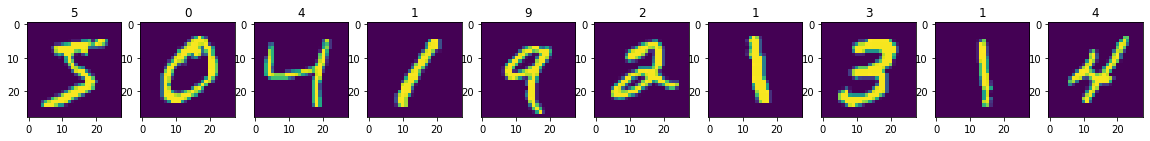

In [5]:
fig, ax = plt.subplots(nrows= 1, ncols=10, figsize=(20,2))
for i in range(0,10):
  ax[i].imshow(X_train[i])
  ax[i].set_title(Y_train[i])

#Data Normalization

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

#Create Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#Train Model

In [11]:
hist = model.fit(
    X_train,
    Y_train,
    epochs=10,
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4624 - accuracy: 0.8811
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3039 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9263
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2622 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2535 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

#Plot Accuracy

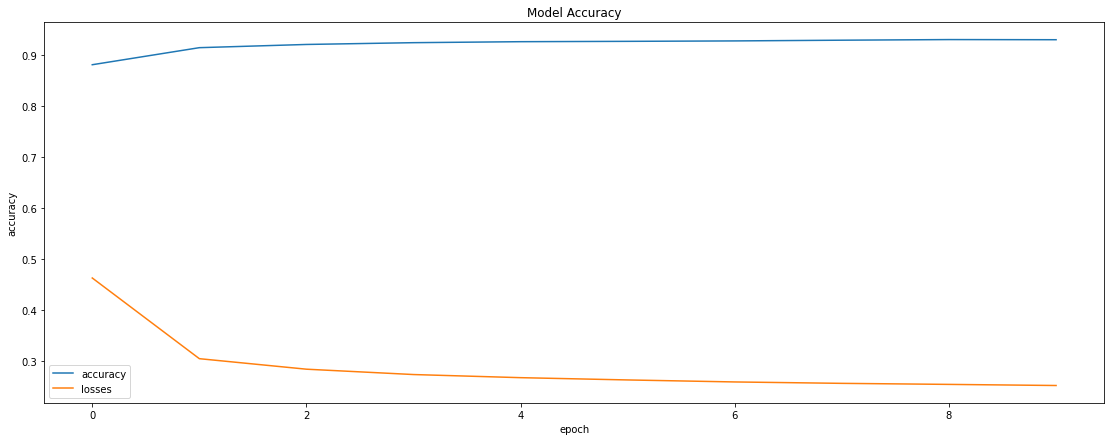

In [12]:
plt.figure(figsize=(19,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'losses'], loc='best')
plt.show()

In [13]:
loss_acc = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss_acc[0],loss_acc[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.9267
Test set
  Loss: 0.264
  Accuracy: 0.927


#Model Predict

In [14]:
prediction = model.predict(X_test)
prediction

313/313 [==============================] - 0s 1ms/step


array([[2.3932748e-07, 2.0974711e-12, 1.3241489e-06, ..., 9.9538791e-01,
        9.9300460e-06, 1.9520518e-04],
       [9.2061455e-05, 1.1059982e-06, 9.9408132e-01, ..., 6.3393261e-19,
        3.5736583e-05, 5.8430334e-16],
       [9.2569280e-07, 9.7870994e-01, 1.3824436e-02, ..., 2.7611741e-04,
        2.8630202e-03, 2.1934157e-04],
       ...,
       [4.7840971e-09, 3.7308934e-09, 4.8398288e-06, ..., 2.5996603e-03,
        9.3031386e-03, 2.5043929e-02],
       [7.8184328e-08, 1.4108011e-07, 8.3119872e-08, ..., 6.7492763e-08,
        7.5812875e-03, 5.5913986e-08],
       [6.9959299e-08, 1.1220263e-15, 1.5822252e-05, ..., 6.2185373e-15,
        2.4975022e-09, 9.3428336e-13]], dtype=float32)

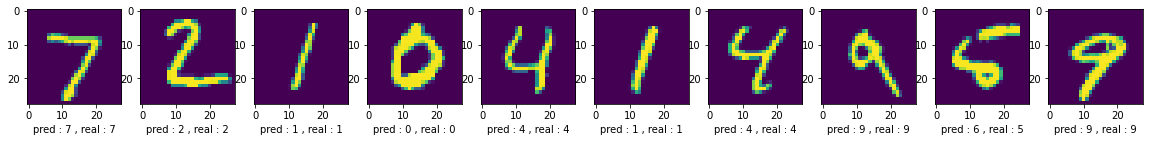

In [15]:
fig, ax = plt.subplots(nrows= 1, ncols=10, figsize=(20,2))
for i in range(0,10):
  ax[i].imshow(X_test[i])
  pred = np.argmax(prediction[i])
  real = Y_test[i]                 
  ax[i].set_xlabel('pred : {0} , real : {1}'.format(str(pred), str(real)))

#Save Model

In [16]:
model.save('mnist_model.hdf5')